## Admissions prediction project

### Introduction
This project trains a machine learning model that will predict if a student will be admitted into an international school.

The columns in the dataset include:

- S/N : Serial Number
- Name : Names of Student
- Email: Student's email address
- GRE: GRE score (out of 340)
- TOEFL:TOEFL Scores ( out of 120 )- University Rating: 
University Rating ( out of 5 )- Statement of Purpose and Letter of Recommendation Strength:
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )-undergraduate gpa(out of 10)


### Learning Outcomes:
- Exploratory Data Analysis
- preparing the data to train a model
- comparing model performances

### Objectives:
The aim of this project is to predict students Eligible(Y) for international admissio.l

### Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read in the dataset
df = pd.read_csv("International Admission.csv")

In [5]:
# Creating a copy of the data
# It is best practice to always make a copy of your dataset
df1 = df.copy()

In [7]:
df1.head()

,Serial No.,first_name,last_name,email,gender,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,Stewart,Piddletown,spiddletown0@ebay.co.uk,Male,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,2.0,Owen,Mabson,omabson1@usgs.gov,Non-binary,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,3.0,Alida,Pedlow,apedlow2@paypal.com,Female,316.0,104.0,3.0,3.0,3.5,8.00,1.0
3,4.0,Alexis,Hands,ahands3@soundcloud.com,Genderqueer,322.0,110.0,3.0,3.5,2.5,8.67,1.0
4,5.0,Amabel,Wolfers,awolfers4@sohu.com,Female,314.0,103.0,2.0,2.0,3.0,8.21,0.0


### Data Cleaning & Exploratory data analysis

In [10]:
#view df columns
df1.columns

Index(['Serial No.', 'first_name', 'last_name', 'email', 'gender', 'GRE Score',
       'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'],
      dtype='object')

In [11]:
# replace column spaces with underscore
new_columns = []
for column in df.columns:
    if " " in column:
        fill = column.replace(" ", "_")
        new_columns.append(fill)
    else:
        new_columns.append(column)

In [14]:
new_columns

['Serial_No.',
 'first_name',
 'last_name',
 'email',
 'gender',
 'GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR_',
 'CGPA',
 'Research']

In [15]:
df1.columns = new_columns

In [18]:
#view the new df columns 
df1.columns

Index(['Serial_No.', 'first_name', 'last_name', 'email', 'gender', 'GRE_Score',
       'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_', 'CGPA', 'Research'],
      dtype='object')

In [19]:
df1

,Serial_No.,first_name,last_name,email,gender,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,1.0,Stewart,Piddletown,spiddletown0@ebay.co.uk,Male,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,2.0,Owen,Mabson,omabson1@usgs.gov,Non-binary,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,3.0,Alida,Pedlow,apedlow2@paypal.com,Female,316.0,104.0,3.0,3.0,3.5,8.00,1.0
3,4.0,Alexis,Hands,ahands3@soundcloud.com,Genderqueer,322.0,110.0,3.0,3.5,2.5,8.67,1.0
4,5.0,Amabel,Wolfers,awolfers4@sohu.com,Female,314.0,103.0,2.0,2.0,3.0,8.21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396,397.0,Darbie,Dunstall,ddunstallb0@devhub.com,Female,325.0,107.0,3.0,3.0,3.5,9.11,1.0
397,398.0,Virgina,Ross,vrossb1@ifeng.com,Female,330.0,116.0,4.0,5.0,4.5,9.45,1.0
398,399.0,Herrick,Howman,hhowmanb2@sogou.com,Male,312.0,103.0,3.0,3.5,4.0,8.78,0.0
399,400.0,Flint,Siviour,fsiviourb3@4shared.com,Male,333.0,117.0,4.0,5.0,4.0,9.66,1.0


In [20]:
df1["gender"].unique()

array(['Male', 'Non-binary', 'Female', 'Genderqueer', 'Agender', 'female',
       'Polygender', 'Bigender', 'Genderfluid'], dtype=object)

In [23]:
#categorize gender into groups for easier understanding
def categorize_gender_inclusive(gender):
    # Convert to lowercase for easier matching
    gender = gender.strip().lower()

    # Mapping genders to their respective categories
    if gender in ['non-binary', 'genderqueer', 'agender', 'polygender', 'bigender', 'genderfluid']:
        return 'Others'
    elif gender == 'male':
        return 'Male'
    elif gender in ['female']:
        return 'Female'
    else:
        return 'Others'

In [25]:
#applying categorised gender to the dataframe
df1['gender']=df1['gender'].apply(categorize_gender_inclusive)

In [27]:
df1["gender"].unique()

array(['Male', 'Others', 'Female'], dtype=object)

In [29]:
df1

,Serial_No.,first_name,last_name,email,gender,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,1.0,Stewart,Piddletown,spiddletown0@ebay.co.uk,Male,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,2.0,Owen,Mabson,omabson1@usgs.gov,Others,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,3.0,Alida,Pedlow,apedlow2@paypal.com,Female,316.0,104.0,3.0,3.0,3.5,8.00,1.0
3,4.0,Alexis,Hands,ahands3@soundcloud.com,Others,322.0,110.0,3.0,3.5,2.5,8.67,1.0
4,5.0,Amabel,Wolfers,awolfers4@sohu.com,Female,314.0,103.0,2.0,2.0,3.0,8.21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396,397.0,Darbie,Dunstall,ddunstallb0@devhub.com,Female,325.0,107.0,3.0,3.0,3.5,9.11,1.0
397,398.0,Virgina,Ross,vrossb1@ifeng.com,Female,330.0,116.0,4.0,5.0,4.5,9.45,1.0
398,399.0,Herrick,Howman,hhowmanb2@sogou.com,Male,312.0,103.0,3.0,3.5,4.0,8.78,0.0
399,400.0,Flint,Siviour,fsiviourb3@4shared.com,Male,333.0,117.0,4.0,5.0,4.0,9.66,1.0


In [31]:
#creating another column eligibility with a function that tells us the student that meet the requirements for admission
def passed(gre_score, toefl_score, cgpa):
    """This function helps categorize students that are eligible for admission based on GRE and TOEFL scores."""
    if gre_score > 310 and toefl_score > 110 and cgpa > 7:
        return "Yes"
    else:
        return "No"

In [34]:
#creating the eligibility column and applying the function to it in other to fill the rows
df1["Eligibility"]=df1.apply(lambda row: passed(row['GRE_Score'], row['TOEFL_Score'], row['CGPA']), axis=1)

In [36]:
#viewing the datafram to see if the eligibility column has been applied
df1

,Serial_No.,first_name,last_name,email,gender,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Eligibility
0,1.0,Stewart,Piddletown,spiddletown0@ebay.co.uk,Male,337.0,118.0,4.0,4.5,4.5,9.65,1.0,Yes
1,2.0,Owen,Mabson,omabson1@usgs.gov,Others,324.0,107.0,4.0,4.0,4.5,8.87,1.0,No
2,3.0,Alida,Pedlow,apedlow2@paypal.com,Female,316.0,104.0,3.0,3.0,3.5,8.00,1.0,No
3,4.0,Alexis,Hands,ahands3@soundcloud.com,Others,322.0,110.0,3.0,3.5,2.5,8.67,1.0,No
4,5.0,Amabel,Wolfers,awolfers4@sohu.com,Female,314.0,103.0,2.0,2.0,3.0,8.21,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397.0,Darbie,Dunstall,ddunstallb0@devhub.com,Female,325.0,107.0,3.0,3.0,3.5,9.11,1.0,No
397,398.0,Virgina,Ross,vrossb1@ifeng.com,Female,330.0,116.0,4.0,5.0,4.5,9.45,1.0,Yes
398,399.0,Herrick,Howman,hhowmanb2@sogou.com,Male,312.0,103.0,3.0,3.5,4.0,8.78,0.0,No
399,400.0,Flint,Siviour,fsiviourb3@4shared.com,Male,333.0,117.0,4.0,5.0,4.0,9.66,1.0,Yes


In [38]:
#mapping the target variable to numerical value
df1["Eligibility"] = df1["Eligibility"].map({"No":0, "Yes":1})

In [40]:
#viewing the dataframe
df1

,Serial_No.,first_name,last_name,email,gender,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Eligibility
0,1.0,Stewart,Piddletown,spiddletown0@ebay.co.uk,Male,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1
1,2.0,Owen,Mabson,omabson1@usgs.gov,Others,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0
2,3.0,Alida,Pedlow,apedlow2@paypal.com,Female,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0
3,4.0,Alexis,Hands,ahands3@soundcloud.com,Others,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0
4,5.0,Amabel,Wolfers,awolfers4@sohu.com,Female,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397.0,Darbie,Dunstall,ddunstallb0@devhub.com,Female,325.0,107.0,3.0,3.0,3.5,9.11,1.0,0
397,398.0,Virgina,Ross,vrossb1@ifeng.com,Female,330.0,116.0,4.0,5.0,4.5,9.45,1.0,1
398,399.0,Herrick,Howman,hhowmanb2@sogou.com,Male,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0
399,400.0,Flint,Siviour,fsiviourb3@4shared.com,Male,333.0,117.0,4.0,5.0,4.0,9.66,1.0,1


In [42]:
#checking for missing values 
df1.isnull().sum()

Serial_No.           1
first_name           0
last_name            0
email                0
gender               0
GRE_Score            1
TOEFL_Score          1
University_Rating    1
SOP                  1
LOR_                 1
CGPA                 1
Research             1
Eligibility          0
dtype: int64

In [44]:
#dropping the missing row values, since its less than 5% it wont affect our result
df1.dropna(axis=0,inplace=True)

In [46]:
#checking the dataframe to see if the missing columns have being dropped 
df1

,Serial_No.,first_name,last_name,email,gender,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Eligibility
0,1.0,Stewart,Piddletown,spiddletown0@ebay.co.uk,Male,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1
1,2.0,Owen,Mabson,omabson1@usgs.gov,Others,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0
2,3.0,Alida,Pedlow,apedlow2@paypal.com,Female,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0
3,4.0,Alexis,Hands,ahands3@soundcloud.com,Others,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0
4,5.0,Amabel,Wolfers,awolfers4@sohu.com,Female,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396.0,Lynde,Hayball,lhayballaz@is.gd,Female,324.0,110.0,3.0,3.5,3.5,9.04,1.0,0
396,397.0,Darbie,Dunstall,ddunstallb0@devhub.com,Female,325.0,107.0,3.0,3.0,3.5,9.11,1.0,0
397,398.0,Virgina,Ross,vrossb1@ifeng.com,Female,330.0,116.0,4.0,5.0,4.5,9.45,1.0,1
398,399.0,Herrick,Howman,hhowmanb2@sogou.com,Male,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0


In [48]:
#checked again for missing values to be certain they are no missing values 
df1.isnull().sum()

Serial_No.           0
first_name           0
last_name            0
email                0
gender               0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Eligibility          0
dtype: int64

In [50]:
df1.shape

(400, 13)

In [52]:
df1.info

<bound method DataFrame.info of      Serial_No. first_name   last_name                    email  gender  \
0           1.0    Stewart  Piddletown  spiddletown0@ebay.co.uk    Male   
1           2.0       Owen      Mabson        omabson1@usgs.gov  Others   
2           3.0      Alida      Pedlow      apedlow2@paypal.com  Female   
3           4.0     Alexis       Hands   ahands3@soundcloud.com  Others   
4           5.0     Amabel     Wolfers       awolfers4@sohu.com  Female   
..          ...        ...         ...                      ...     ...   
395       396.0      Lynde     Hayball         lhayballaz@is.gd  Female   
396       397.0     Darbie    Dunstall   ddunstallb0@devhub.com  Female   
397       398.0    Virgina        Ross        vrossb1@ifeng.com  Female   
398       399.0    Herrick      Howman      hhowmanb2@sogou.com    Male   
399       400.0      Flint     Siviour   fsiviourb3@4shared.com    Male   

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  Re

In [54]:
df1.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Eligibility
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.297500
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.457731
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [56]:
numerical_cols = df1.select_dtypes("number").columns
numerical_cols

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR_', 'CGPA', 'Research', 'Eligibility'],
      dtype='object')

In [58]:
#checking the columns that correlate with "elegibility"
df1.select_dtypes("number").corr()["Eligibility"]


Serial_No.          -0.124579
GRE_Score            0.714349
TOEFL_Score          0.776010
University_Rating    0.591655
SOP                  0.497039
LOR_                 0.430564
CGPA                 0.677616
Research             0.459771
Eligibility          1.000000
Name: Eligibility, dtype: float64

array([[<Axes: title={'center': 'Serial_No.'}>,
        <Axes: title={'center': 'GRE_Score'}>,
        <Axes: title={'center': 'TOEFL_Score'}>],
       [<Axes: title={'center': 'University_Rating'}>,
        <Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR_'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Eligibility'}>]], dtype=object)

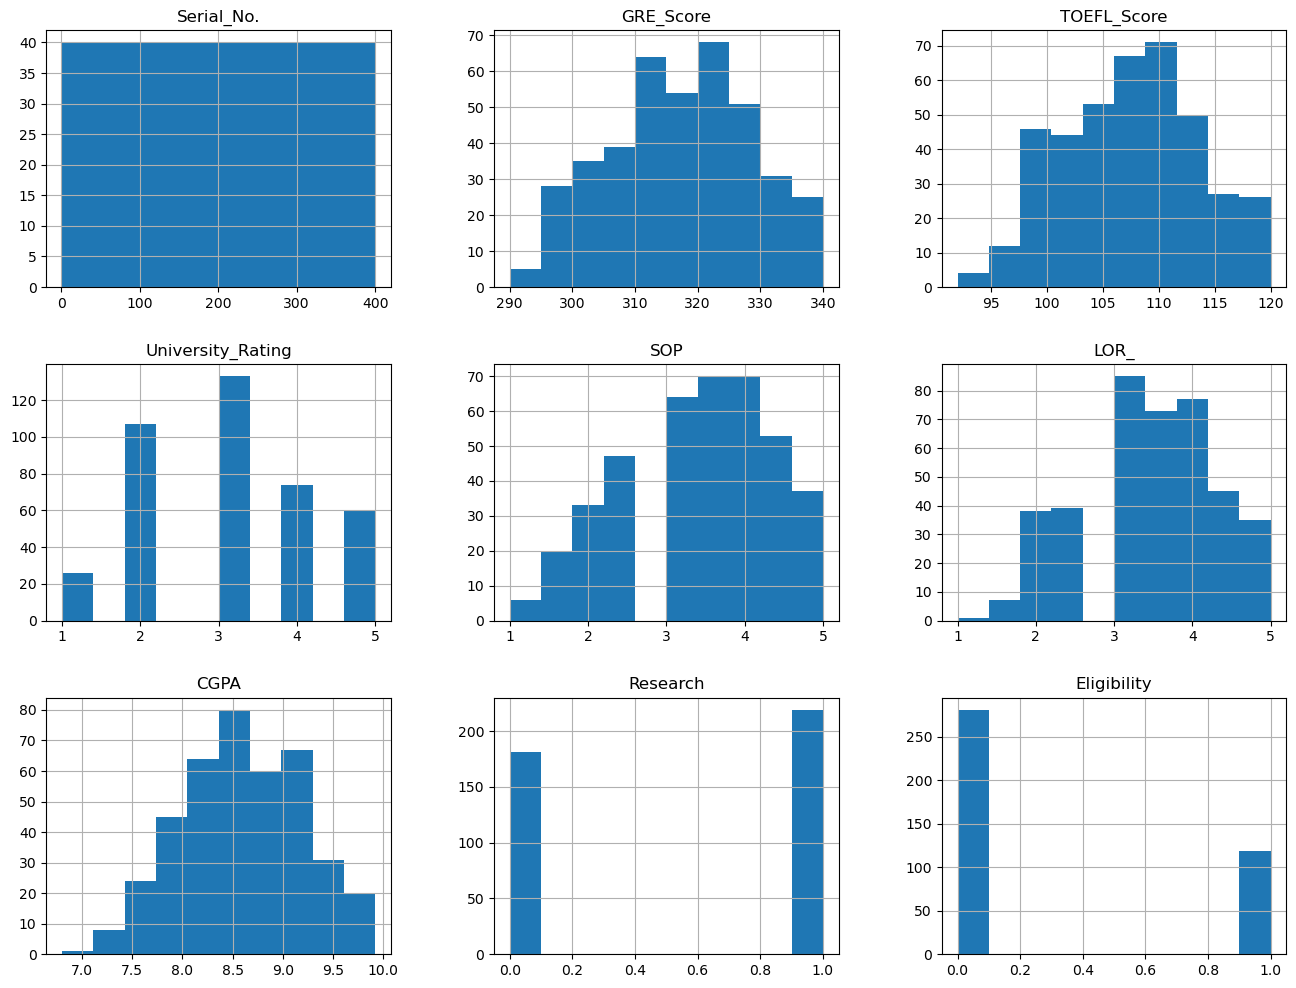

In [60]:
#from the histogram below we can observe that they are no skewed columns
df1[numerical_cols].hist(figsize=(16, 12))

In [62]:
#checking for skewed columns
df1[numerical_cols].skew().sort_values(ascending= False)

Eligibility          0.889246
University_Rating    0.171260
TOEFL_Score          0.057216
Serial_No.           0.000000
GRE_Score           -0.062893
CGPA                -0.065991
LOR_                -0.106991
Research            -0.191582
SOP                 -0.275761
dtype: float64

In [64]:
# Checking for outliers in the dataset
def outliers_func():
        outliers_cols = []
    
        for col in df1.select_dtypes("number"): 
            q1 = df1[col].quantile(.25)
            q3 = df1[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df1[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df1[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols


In [66]:
# calling the outliers function
outlier_columns = outliers_func()

In [68]:
outlier_columns

['LOR_', 'CGPA']

In [70]:
#drouping irrelevant columns
df1.drop(["Serial_No.", "email", "first_name", "last_name", "gender"], axis=1, inplace=True)

In [72]:
df1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Eligibility
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0
...,...,...,...,...,...,...,...,...
395,324.0,110.0,3.0,3.5,3.5,9.04,1.0,0
396,325.0,107.0,3.0,3.0,3.5,9.11,1.0,0
397,330.0,116.0,4.0,5.0,4.5,9.45,1.0,1
398,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0


In [74]:
def get_unique_values(df1):
    for column in df1.columns:
        print(f"Unique values in '{column}':")
        print(df1[column].unique())
        print("\n")

# Call the function
get_unique_values(df1)

Unique values in 'GRE_Score':
[337. 324. 316. 322. 314. 330. 321. 308. 302. 323. 325. 327. 328. 307.
 311. 317. 319. 318. 303. 312. 334. 336. 340. 298. 295. 310. 300. 338.
 331. 320. 299. 304. 313. 332. 326. 329. 339. 309. 315. 301. 296. 294.
 306. 305. 290. 335. 333. 297. 293.]


Unique values in 'TOEFL_Score':
[118. 107. 104. 110. 103. 115. 109. 101. 102. 108. 106. 111. 112. 105.
 114. 116. 119. 120.  98.  93.  99.  97. 117. 113. 100.  95.  96.  94.
  92.]


Unique values in 'University_Rating':
[4. 3. 2. 5. 1.]


Unique values in 'SOP':
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]


Unique values in 'LOR_':
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]


Unique values in 'CGPA':
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8

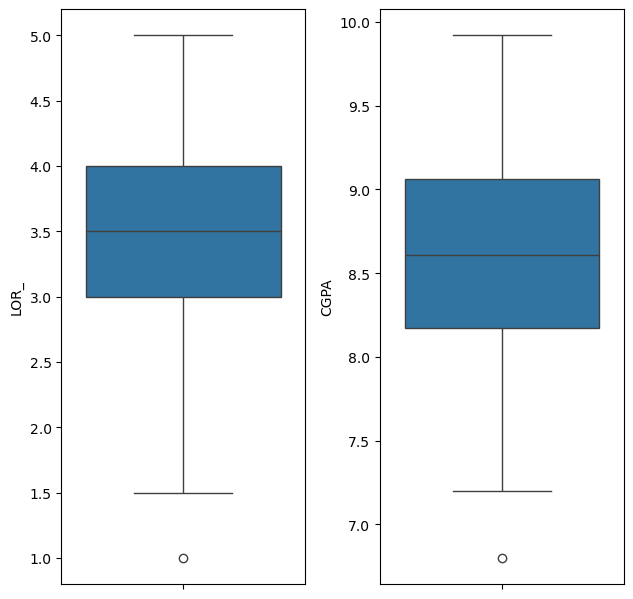

In [76]:
# Visualizing the boxplot for the columns with outliers

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

## Data Processing

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
# Scaling the columns with outliers
#df1[outlier_columns] = scaler.fit_transform(df1[outlier_columns])
#df1[outlier_columns]

In [83]:
df1 = pd.get_dummies(df1)
df1.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Eligibility
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0


In [85]:
#storing my features into x and target to my y
X = df1.drop(columns= ['Eligibility'])
y = df1['Eligibility']

## Data Modelling

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=42)

In [92]:
log = LogisticRegression()
dec = DecisionTreeClassifier()
rand = RandomForestClassifier()

In [94]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [96]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(320, 7) (80, 7)
(320,) (80,)


In [98]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, x_test, Y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(x_test)
        training_accuracy = accuracy_score(training_predict, Y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores

In [100]:
# The DecisionTree Classifier and the RandomForest Classifier perform better among the models
fit_predict_and_score(models, X_train, X_test, y_train, y_test)

{'Logistic Regression': ' has a  score of 0.875 on training set and a score of 0.9 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on training set and a score of 1.0 on testing set',
 'Random Forest': ' has a  score of 1.0 on training set and a score of 1.0 on testing set',
 'SVC': ' has a  score of 0.696875 on training set and a score of 0.725 on testing set'}

In [102]:
for name, model in models.items():
    print(model.fit(X_train, y_train))
    print(model.score(X_train, y_train))

LogisticRegression()
0.875
DecisionTreeClassifier()
1.0
RandomForestClassifier()
1.0
SVC()
0.696875


### Evaluating model performance
I evaluated the performance of the two models (DecisionTree & RandomForest Classifier) that have better score on the test dataset

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rand = RandomForestClassifier()
rand.fit(X_train, y_train)
rand_prediction = rand.predict(X_test)

In [107]:
rand_prediction

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [109]:
rand_score = cross_val_score(rand, X_train, y_train, cv = 5, scoring = "accuracy")

In [110]:
np.mean(rand_score)

0.996875

In [111]:
# Classification report
print(classification_report(y_test, rand_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        22

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Saving the trained model

In [116]:
import pickle

In [118]:
filename = "Admission_model.sav"
pickle.dump(rand, open(filename, "wb"))

## Streamlit & deployment

In [121]:
X_test.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR_', 'CGPA',
       'Research'],
      dtype='object')

In [123]:
row_index = 53

# Convert to a list and print without column names
row_values = X_test.iloc[row_index].tolist()
print(row_values)

[332.0, 118.0, 5.0, 5.0, 5.0, 9.64, 1.0]


In [127]:
input_data = ([332.0, 118.0, 5.0, 5.0, 5.0, 9.64, 1.0])

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rand.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Unlikely to be admitted")
else:
    print("Likely to be admitted")

Likely to be admitted
